# KNN algorithm
---

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import math

In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
df = pd.read_csv(url,names=names,header=None)

In [3]:
df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


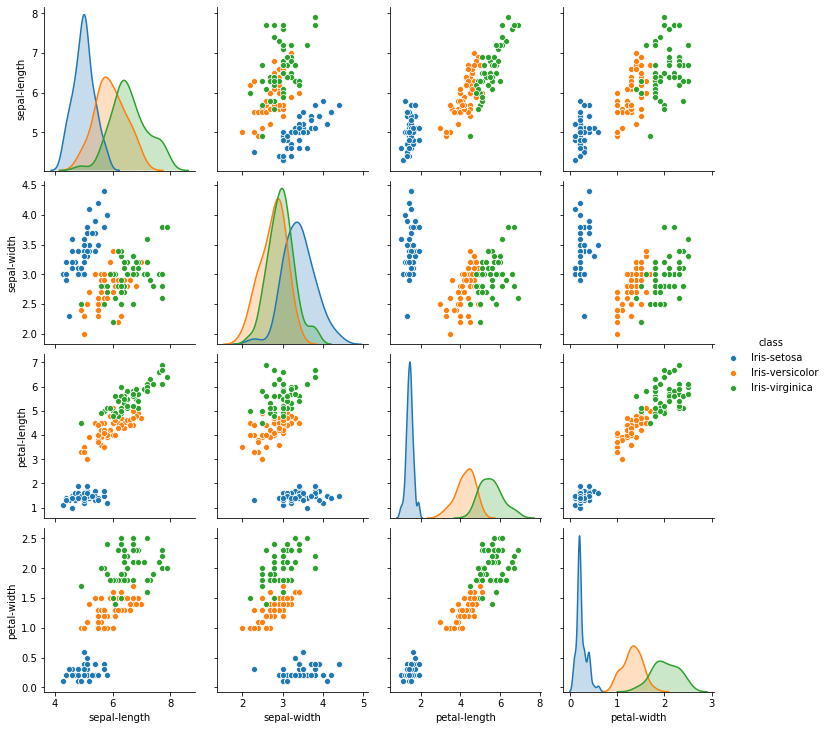

In [4]:
sns.pairplot(df,hue='class')

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [6]:
X = df.iloc[:,df.columns!='class'].values
Y = df['class'].values

In [7]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,stratify=Y,test_size=0.3,random_state=0)

In [8]:
def euclidean_dist(test,train):
    s=0
    for i in range(len(test)):
        s = ((train[i]-test[i])*(train[i]-test[i])) +s
    dist = np.sqrt(s)
    return dist

In [9]:
# KNN
def KNN(x_train,y_train,x_test,k):
    predict = [] # list of prediction for testing dataset
    for i in x_test:
        dist_list = []
        for j in x_train:
            euc_dist = euclidean_dist(i,j)
            dist_list.append(euc_dist)
        z = pd.DataFrame({'dist':dist_list,'class':y_train})
        z = z.sort_values(['dist'])
        z.reset_index(drop=True,inplace=True)
        top_class = z.loc[:(k-1),'class'].value_counts().index[0] # because last row is inclusive so k-1
        predict.append(top_class)
    return predict

In [10]:
# predicting test dataset

predict = KNN(x_train,y_train,x_test,7) 

In [11]:
len(predict)

45

In [12]:
predict

['Iris-virginica',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-virginica']

In [13]:
pd.DataFrame({'actual':y_test,'predict':predict})

,actual,predict
0,Iris-virginica,Iris-virginica
1,Iris-virginica,Iris-virginica
2,Iris-setosa,Iris-setosa
3,Iris-setosa,Iris-setosa
4,Iris-versicolor,Iris-versicolor
5,Iris-setosa,Iris-setosa
6,Iris-versicolor,Iris-versicolor
7,Iris-virginica,Iris-virginica
8,Iris-setosa,Iris-setosa
9,Iris-versicolor,Iris-versicolor


In [14]:
print(classification_report(y_test,predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        15
 Iris-virginica       1.00      1.00      1.00        15

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [15]:
# accuracy score

def accuracy_score(y_test,predict):
    true_positive=0
    for i,j in zip(y_test,predict):
        if i is j:
            true_positive = true_positive+1
    accuracy = true_positive/len(y_test)
    return accuracy

In [16]:
accuracy_score(y_test,predict)

1.0

In [17]:
# 100% accuracy:)